<a href="https://colab.research.google.com/github/srikanthp147/Heart-Failure-Detection/blob/main/hfdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Extraction


In [366]:
df=pd.read_csv("heartfailure.csv")
cols=["age","anaemia","cr_phosp","diabetes","eject_frac","high_bp","platelets","s_cr","s_sodium","sex","smoking","time","death_chance"]
df.columns=cols

In [367]:
df

,age,anaemia,cr_phosp,diabetes,eject_frac,high_bp,platelets,s_cr,s_sodium,sex,smoking,time,death_chance
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [368]:
df.shape

(299, 13)

In [369]:
df.describe()

,age,anaemia,cr_phosp,diabetes,eject_frac,high_bp,platelets,s_cr,s_sodium,sex,smoking,time,death_chance
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Data Preprocessing


In [370]:
x=df.drop('death_chance',axis=1)
y=df['death_chance']

In [371]:
x

,age,anaemia,cr_phosp,diabetes,eject_frac,high_bp,platelets,s_cr,s_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [372]:
y

,death_chance
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


In [373]:
df.isnull().sum()

,0
age,0
anaemia,0
cr_phosp,0
diabetes,0
eject_frac,0
high_bp,0
platelets,0
s_cr,0
s_sodium,0
sex,0


# Exploratory Data Analysis

In [374]:
living=len(df[df['death_chance']==0])
dead=len(df[df['death_chance']==1])

In [375]:
print(living,dead)

203 96


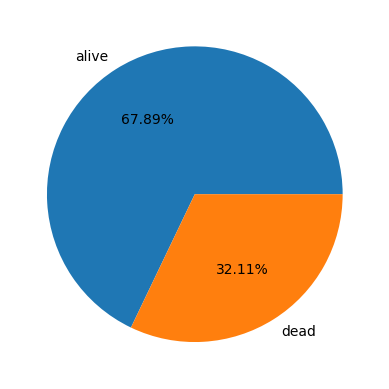

In [376]:
plt.pie([living,dead],labels=['alive','dead'],autopct='%1.2f%%')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

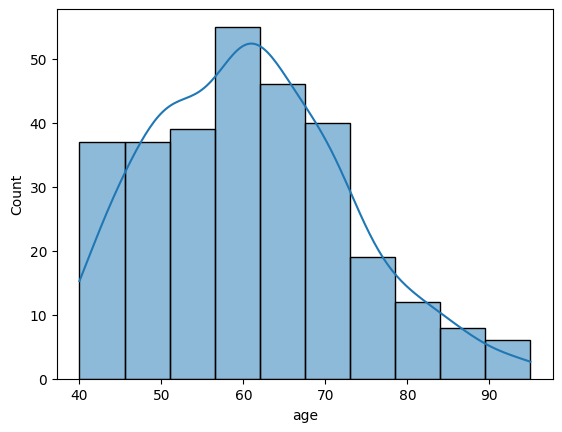

In [377]:
sns.histplot(df['age'],kde='True')

In [378]:
al=len(df[df.age>=50][df.death_chance==0])
ad=len(df[df.age>=50][df.death_chance==1])

<ipython-input-378-0a131a89a0d1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  al=len(df[df.age>=50][df.death_chance==0])
<ipython-input-378-0a131a89a0d1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ad=len(df[df.age>=50][df.death_chance==1])


In [379]:
print(al,ad)

167 85


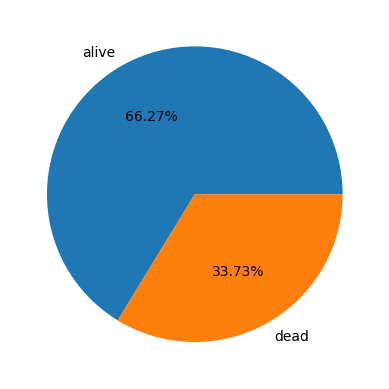

In [380]:
plt.pie([al,ad],labels=['alive','dead'],autopct='%1.2f%%')
plt.show()

In [381]:
adl=len(df[df.age>=50][df.diabetes==1][df.death_chance==1])
add=len(df[df.age>=50][df.diabetes==1][df.death_chance==0])

<ipython-input-381-19b0ee50e6d0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  adl=len(df[df.age>=50][df.diabetes==1][df.death_chance==1])
<ipython-input-381-19b0ee50e6d0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  adl=len(df[df.age>=50][df.diabetes==1][df.death_chance==1])
<ipython-input-381-19b0ee50e6d0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  add=len(df[df.age>=50][df.diabetes==1][df.death_chance==0])
<ipython-input-381-19b0ee50e6d0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  add=len(df[df.age>=50][df.diabetes==1][df.death_chance==0])


In [382]:
print(adl,add)

34 70


<Axes: >

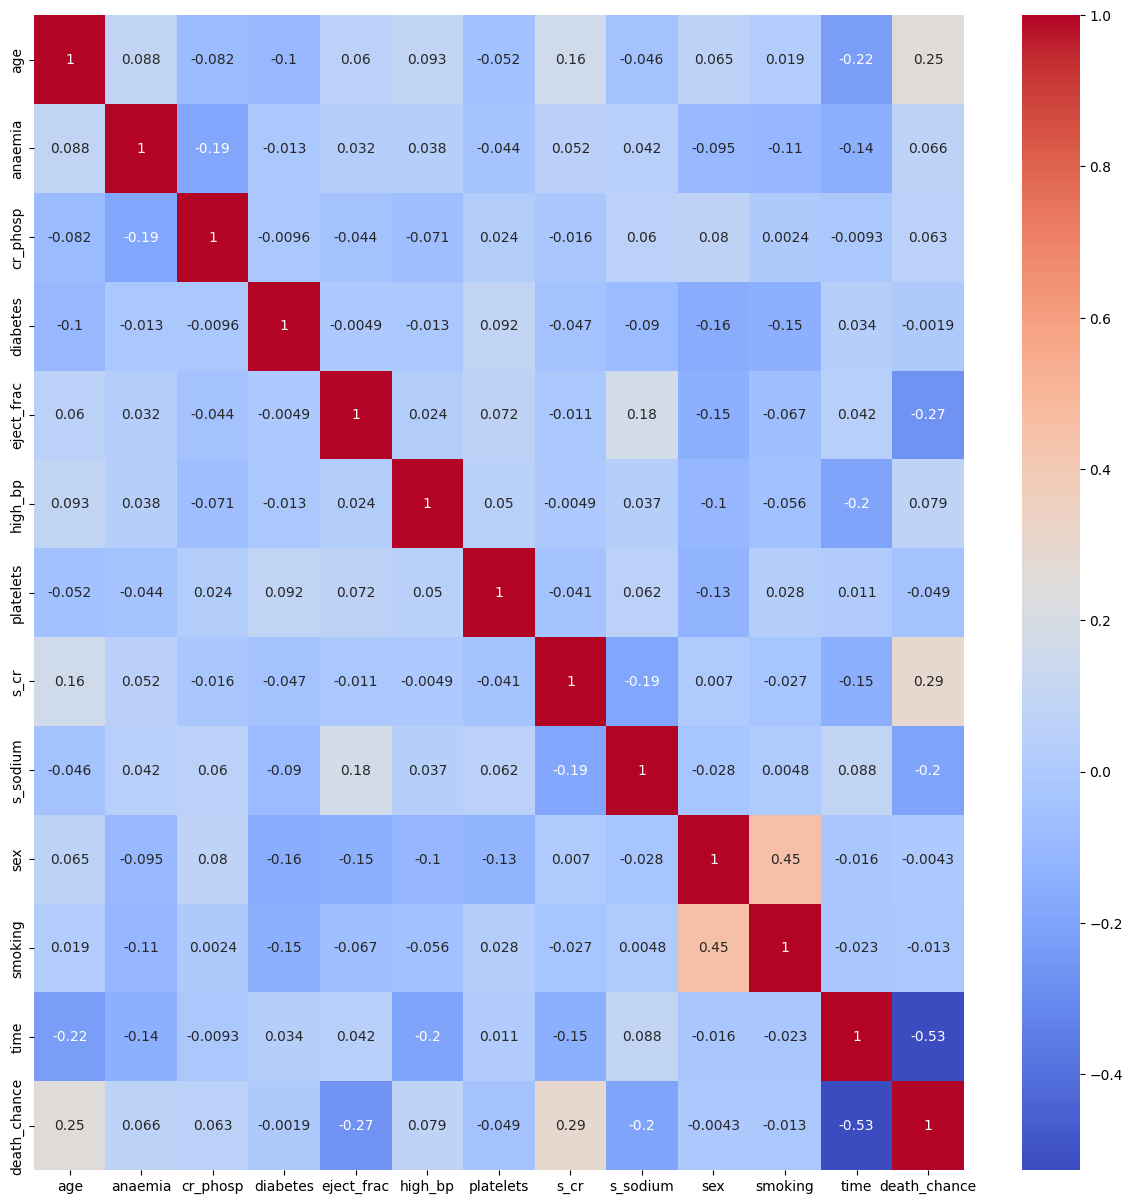

In [383]:
h_corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(h_corr,annot=True,cmap='coolwarm')

# Dataset Development

In [384]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [385]:
x_train

,age,anaemia,cr_phosp,diabetes,eject_frac,high_bp,platelets,s_cr,s_sodium,sex,smoking,time
13,50.0,1,168,0,38,1,276000.0,1.10,137,1,0,11
79,55.0,0,336,0,45,1,324000.0,0.90,140,0,0,74
62,55.0,0,109,0,35,0,254000.0,1.10,139,1,1,60
82,60.0,1,76,1,25,0,196000.0,2.50,132,0,0,77
222,42.0,1,86,0,35,0,365000.0,1.10,139,1,1,201
...,...,...,...,...,...,...,...,...,...,...,...,...
224,58.0,0,582,1,25,0,504000.0,1.00,138,1,0,205
31,85.0,0,23,0,45,0,360000.0,3.00,132,1,0,28
168,65.0,0,582,1,40,0,270000.0,1.00,138,0,0,140
113,70.0,1,143,0,60,0,351000.0,1.30,137,0,0,90


In [386]:
y_train

,death_chance
13,1
79,0
62,0
82,1
222,0
...,...
224,0
31,1
168,0
113,1


In [387]:
x_test

,age,anaemia,cr_phosp,diabetes,eject_frac,high_bp,platelets,s_cr,s_sodium,sex,smoking,time
19,48.0,1,582,1,55,0,87000.00,1.90,121,0,0,15
175,60.0,1,95,0,60,0,337000.00,1.00,138,1,1,146
293,63.0,1,103,1,35,0,179000.00,0.90,136,1,1,270
266,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241
287,45.0,0,582,1,55,0,543000.00,1.00,132,0,0,250
...,...,...,...,...,...,...,...,...,...,...,...,...
140,80.0,0,805,0,38,0,263358.03,1.10,134,1,0,109
228,65.0,0,56,0,25,0,237000.00,5.00,130,0,0,207
212,78.0,0,224,0,50,0,481000.00,1.40,138,1,1,192
171,52.0,0,3966,0,40,0,325000.00,0.90,140,1,1,146


# Feature Engineering


In [388]:
def feature_engineering(x):
  fea=x.columns
  s=len(fea)
  x_deep=x.copy(deep=True)
  for i in range(s):
    x1=fea[i]
    x2=x[x1]
    for j in range(i+1,s):
      x3=fea[j]
      x4=x[x3]
      x_new_lab=x1+"_"+x3
      x_new_data=x2*x4
      x_deep[x_new_lab]=x_new_data
  return x_deep

In [389]:
feature_engineering(x)

,age,anaemia,cr_phosp,diabetes,eject_frac,high_bp,platelets,s_cr,s_sodium,sex,...,s_cr_s_sodium,s_cr_sex,s_cr_smoking,s_cr_time,s_sodium_sex,s_sodium_smoking,s_sodium_time,sex_smoking,sex_time,smoking_time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,...,247.0,1.9,0.0,7.6,130,0,520,0,4,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,...,149.6,1.1,0.0,6.6,136,0,816,0,6,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,...,167.7,1.3,1.3,9.1,129,129,903,1,7,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,...,260.3,1.9,0.0,13.3,137,0,959,0,7,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,...,313.2,0.0,0.0,21.6,0,0,928,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,...,157.3,1.1,1.1,297.0,143,143,38610,1,270,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,...,166.8,0.0,0.0,325.2,0,0,37669,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,...,110.4,0.0,0.0,222.4,0,0,38364,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,...,196.0,1.4,1.4,392.0,140,140,39200,1,280,280


# Model Building

In [390]:
x_train_mod=feature_engineering(x_train)

In [391]:
x_train_mod

,age,anaemia,cr_phosp,diabetes,eject_frac,high_bp,platelets,s_cr,s_sodium,sex,...,s_cr_s_sodium,s_cr_sex,s_cr_smoking,s_cr_time,s_sodium_sex,s_sodium_smoking,s_sodium_time,sex_smoking,sex_time,smoking_time
13,50.0,1,168,0,38,1,276000.0,1.10,137,1,...,150.7,1.1,0.0,12.10,137,0,1507,0,11,0
79,55.0,0,336,0,45,1,324000.0,0.90,140,0,...,126.0,0.0,0.0,66.60,0,0,10360,0,0,0
62,55.0,0,109,0,35,0,254000.0,1.10,139,1,...,152.9,1.1,1.1,66.00,139,139,8340,1,60,60
82,60.0,1,76,1,25,0,196000.0,2.50,132,0,...,330.0,0.0,0.0,192.50,0,0,10164,0,0,0
222,42.0,1,86,0,35,0,365000.0,1.10,139,1,...,152.9,1.1,1.1,221.10,139,139,27939,1,201,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,58.0,0,582,1,25,0,504000.0,1.00,138,1,...,138.0,1.0,0.0,205.00,138,0,28290,0,205,0
31,85.0,0,23,0,45,0,360000.0,3.00,132,1,...,396.0,3.0,0.0,84.00,132,0,3696,0,28,0
168,65.0,0,582,1,40,0,270000.0,1.00,138,0,...,138.0,0.0,0.0,140.00,0,0,19320,0,0,0
113,70.0,1,143,0,60,0,351000.0,1.30,137,0,...,178.1,0.0,0.0,117.00,0,0,12330,0,0,0


In [392]:
x_test_mod=feature_engineering(x_test)

In [393]:
x_test_mod

,age,anaemia,cr_phosp,diabetes,eject_frac,high_bp,platelets,s_cr,s_sodium,sex,...,s_cr_s_sodium,s_cr_sex,s_cr_smoking,s_cr_time,s_sodium_sex,s_sodium_smoking,s_sodium_time,sex_smoking,sex_time,smoking_time
19,48.0,1,582,1,55,0,87000.00,1.90,121,0,...,229.90,0.00,0.00,28.50,0,0,1815,0,0,0
175,60.0,1,95,0,60,0,337000.00,1.00,138,1,...,138.00,1.00,1.00,146.00,138,138,20148,1,146,146
293,63.0,1,103,1,35,0,179000.00,0.90,136,1,...,122.40,0.90,0.90,243.00,136,136,36720,1,270,270
266,55.0,0,1199,0,20,0,263358.03,1.83,134,1,...,245.22,1.83,1.83,441.03,134,134,32294,1,241,241
287,45.0,0,582,1,55,0,543000.00,1.00,132,0,...,132.00,0.00,0.00,250.00,0,0,33000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,80.0,0,805,0,38,0,263358.03,1.10,134,1,...,147.40,1.10,0.00,119.90,134,0,14606,0,109,0
228,65.0,0,56,0,25,0,237000.00,5.00,130,0,...,650.00,0.00,0.00,1035.00,0,0,26910,0,0,0
212,78.0,0,224,0,50,0,481000.00,1.40,138,1,...,193.20,1.40,1.40,268.80,138,138,26496,1,192,192
171,52.0,0,3966,0,40,0,325000.00,0.90,140,1,...,126.00,0.90,0.90,131.40,140,140,20440,1,146,146


In [394]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [395]:
def performance_metrics(y_test, y_pred):
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred))
    print("Precision Score:- ", precision_score(y_test, y_pred))
    print("Recall Score:- ", recall_score(y_test, y_pred))

# Logistic Regression


In [396]:
from sklearn.linear_model import LogisticRegression

log_reg_model=LogisticRegression()
log_reg_model.fit(x_train_mod,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [397]:
y_pred=log_reg_model.predict(x_test_mod)

In [398]:
print(performance_metrics(y_test,y_pred))

Accuracy Score:-  0.75
Precision Score:-  0.6486486486486487
Recall Score:-  0.5853658536585366
None


# Random Forest


In [399]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20, clf=RandomForestClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(x_train, y_train)
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_
    return best_model

In [400]:
randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20],
                         }, clf=RandomForestClassifier(random_state=2))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

RandomForestClassifier(max_depth=4, max_features=0.7, min_samples_leaf=4,
                       random_state=2)

In [401]:
rf_clf = RandomForestClassifier(max_depth=10, max_features=0.6,
                       min_impurity_decrease=0.1, min_samples_leaf=20,
                       random_state=2)
rf_clf.fit(x_train, y_train)
pred2 = rf_clf.predict(x_test)
performance_metrics(y_test, pred2)

Accuracy Score:-  0.8583333333333333
Precision Score:-  0.875
Recall Score:-  0.6829268292682927


# XGBoost


In [402]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree= 1.0,
 learning_rate = 0.1,
 max_depth = 4,
 n_estimators= 400,
 early_stopping_rounds=10, eval_metric="logloss",
 subsample= 1.0)

eval_set  = [(x_test, y_test)]
xgb1.fit(x_train, y_train,eval_set=eval_set, verbose=True)


[0]	validation_0-logloss:0.60345
[1]	validation_0-logloss:0.57254
[2]	validation_0-logloss:0.54151
[3]	validation_0-logloss:0.52168
[4]	validation_0-logloss:0.50232
[5]	validation_0-logloss:0.48266
[6]	validation_0-logloss:0.46708
[7]	validation_0-logloss:0.45687
[8]	validation_0-logloss:0.44571
[9]	validation_0-logloss:0.44017
[10]	validation_0-logloss:0.43451
[11]	validation_0-logloss:0.42869
[12]	validation_0-logloss:0.42438
[13]	validation_0-logloss:0.41793
[14]	validation_0-logloss:0.41626
[15]	validation_0-logloss:0.41396
[16]	validation_0-logloss:0.41035
[17]	validation_0-logloss:0.40921
[18]	validation_0-logloss:0.40749
[19]	validation_0-logloss:0.40562
[20]	validation_0-logloss:0.40670
[21]	validation_0-logloss:0.40439
[22]	validation_0-logloss:0.40506
[23]	validation_0-logloss:0.40474
[24]	validation_0-logloss:0.40385
[25]	validation_0-logloss:0.40625
[26]	validation_0-logloss:0.40496
[27]	validation_0-logloss:0.40508
[28]	validation_0-logloss:0.40669
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [403]:
pred3 = xgb1.predict(x_test)
performance_metrics(y_test, pred3)

Accuracy Score:-  0.8416666666666667
Precision Score:-  0.8055555555555556
Recall Score:-  0.7073170731707317
